<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Séries Temporais 

##Extração e Visualização dos dados.

In [1]:
#Baixar as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()
%matplotlib inline

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

from pandas_datareader import data as wb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [0]:
#Desconsiderar mensagem de warning.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [0]:
!pip install -U -q pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [0]:
#df = pd.read_excel("/content/drive/My Drive/DataFrames/JBSS.xlsx")
#df


In [0]:
#df['Data'] = df['Data'].dt.strftime('"%m-%d-%Y"')
#df

In [7]:
#Entradas.
ativo = ["BOVA11.SA"]
data_inicio = "2019-01-01"
data_termino = None

#Carregar o Dataset.
#df = wb.get_data_yahoo("BOVA11.SA", start="2018-01-01", end="2019-01-01", index = "Date")["Adj Close"]
df = wb.DataReader( ativo, data_source = "yahoo", start = data_inicio, end = data_termino)["Adj Close"]
df.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
Name: Adj Close, dtype: float64

In [8]:
df.index = pd.to_datetime(df.index, format="%m-%d-%Y")
#df.drop("Date", axis=1, inplace=True)

df

Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
                ...    
2020-05-13    75.150002
2020-05-14    76.250000
2020-05-15    74.559998
2020-05-18    78.349998
2020-05-19    77.650002
Name: Adj Close, Length: 340, dtype: float64

In [0]:
#f['Data'] = pd.to_datetime(df['Data'], format= )


In [0]:
#from datetime import datetime
#df["Data"] = pd.to_datetime(df["Data"], infer_datetime_format=True)

#index_data = df.set_index(["Data"])
#index_data.head()

#df.index = pd.to_datetime(df["Data"])
#df.drop(df["Data"], axis=1, inplace=True)
#df.head()

In [11]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', name='Date', length=340, freq=None)

In [0]:
#Transformar o index em datetime.


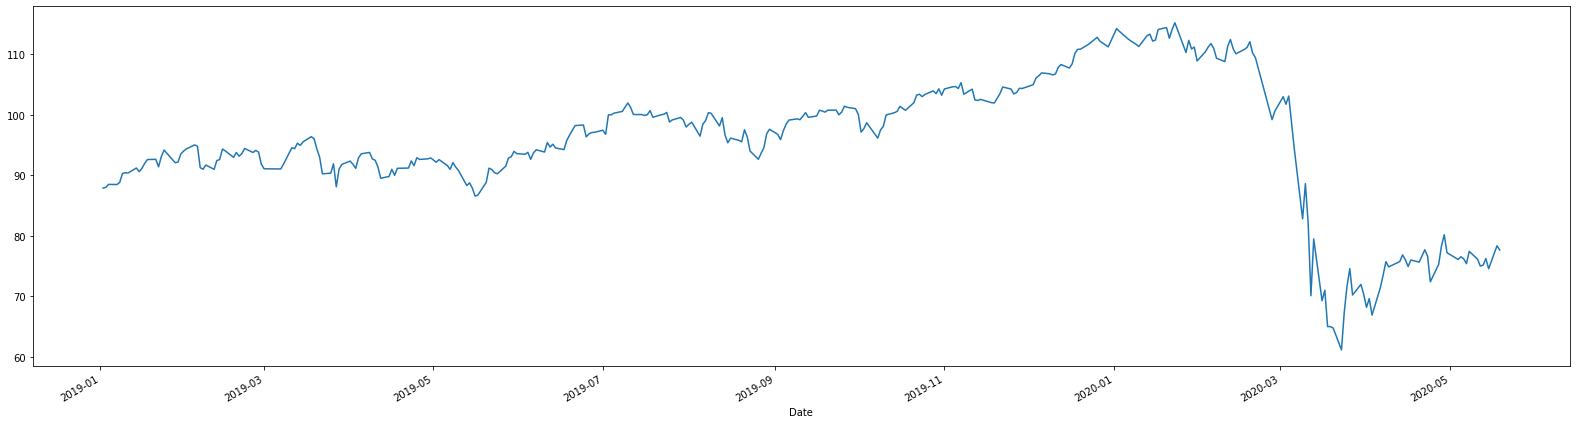

In [13]:
#Visualizacao do meu conjunto de dados.
df.plot(figsize = (22,6));
#df.rolling(9).mean().plot()
#ax.legend([ ativo , "MM9"])
#ax.set_title(ativo)
plt.tight_layout();


### 3. Como decompor uma Time Series em seus componentes

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.

A biblioteca `stats`
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
#Salvar a decomposicao em result.
result = seasonal_decompose(df, freq= 50)

#Plotar a decomposicao
#result.plot();
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=( 10,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()


In [15]:
df

Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
                ...    
2020-05-13    75.150002
2020-05-14    76.250000
2020-05-15    74.559998
2020-05-18    78.349998
2020-05-19    77.650002
Name: Adj Close, Length: 340, dtype: float64

In [0]:
df1 = df.reset_index()

In [17]:
df1

,Date,Adj Close
0,2019-01-02,87.900002
1,2019-01-03,88.000000
2,2019-01-04,88.500000
3,2019-01-07,88.480003
4,2019-01-08,88.830002
...,...,...
335,2020-05-13,75.150002
336,2020-05-14,76.250000
337,2020-05-15,74.559998
338,2020-05-18,78.349998


In [18]:
df1["Date"]

0     2019-01-02
1     2019-01-03
2     2019-01-04
3     2019-01-07
4     2019-01-08
         ...    
335   2020-05-13
336   2020-05-14
337   2020-05-15
338   2020-05-18
339   2020-05-19
Name: Date, Length: 340, dtype: datetime64[ns]

In [19]:
df2 = df1["Adj Close"].pct_change()
df2

0           NaN
1      0.001138
2      0.005682
3     -0.000226
4      0.003956
         ...   
335    0.002000
336    0.014637
337   -0.022164
338    0.050832
339   -0.008934
Name: Adj Close, Length: 340, dtype: float64

In [0]:
df1.Date = pd.to_datetime(df1.Date, format = "%d-%m-%Y")

In [0]:
%config InlineBackend.figure_format = 'svg'


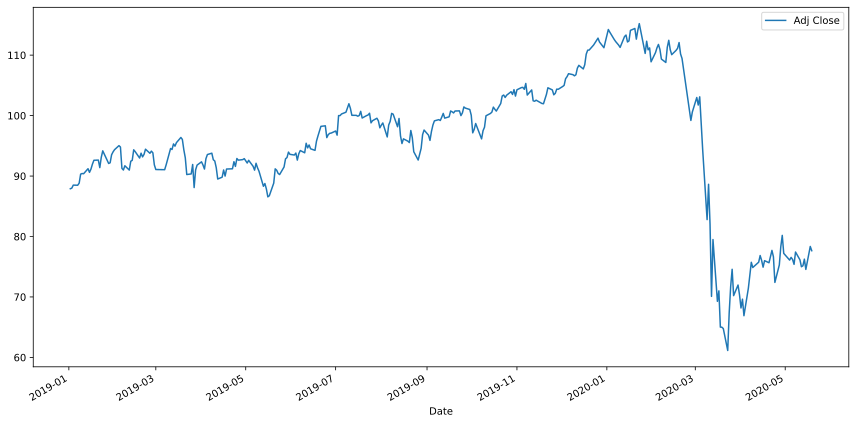

In [22]:
fig, ax = plt.subplots(figsize = (12,6))
df1.plot(x= "Date", y= "Adj Close", ax=ax)
plt.tight_layout();

In [23]:
df1["retorno"] = df1["Adj Close"].pct_change()
df1["retorno"] 

0           NaN
1      0.001138
2      0.005682
3     -0.000226
4      0.003956
         ...   
335    0.002000
336    0.014637
337   -0.022164
338    0.050832
339   -0.008934
Name: retorno, Length: 340, dtype: float64

In [24]:
 frames = [df1,df2]
result = pd.concat(frames, axis = 1)

result.tail()

,Date,Adj Close,retorno,Adj Close
335,2020-05-13,75.150002,0.002000,0.002000
336,2020-05-14,76.250000,0.014637,0.014637
337,2020-05-15,74.559998,-0.022164,-0.022164
338,2020-05-18,78.349998,0.050832,0.050832
339,2020-05-19,77.650002,-0.008934,-0.008934


In [25]:

result["Date"].dtypes

dtype('<M8[ns]')

In [26]:
result['year'] = result.Date.dt.year
result['month'] = result.Date.dt.month
result['day'] = result.Date.dt.day
result['dayofweek'] = result.Date.dt.dayofweek



result.head(10)

,Date,Adj Close,retorno,Adj Close,year,month,day,dayofweek
0,2019-01-02,87.900002,NaN,NaN,2019,1,2,2
1,2019-01-03,88.000000,0.001138,0.001138,2019,1,3,3
2,2019-01-04,88.500000,0.005682,0.005682,2019,1,4,4
3,2019-01-07,88.480003,-0.000226,-0.000226,2019,1,7,0
4,2019-01-08,88.830002,0.003956,0.003956,2019,1,8,1
5,2019-01-09,90.320000,0.016774,0.016774,2019,1,9,2
6,2019-01-10,90.419998,0.001107,0.001107,2019,1,10,3
7,2019-01-11,90.379997,-0.000442,-0.000442,2019,1,11,4
8,2019-01-14,91.209999,0.009183,0.009183,2019,1,14,0
9,2019-01-15,90.610001,-0.006578,-0.006578,2019,1,15,1


In [0]:
#Criar uma forma de avaliar os retornos no ano e nos messes, avaliar notebook que há a descrição da filtargem dos dados por messes e anos.

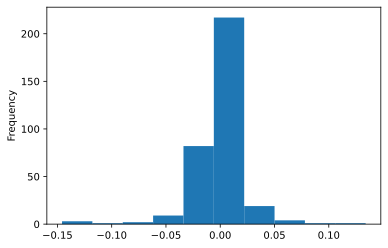

In [29]:
df1["retorno"].plot.hist();

In [30]:
df

Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
                ...    
2020-05-13    75.150002
2020-05-14    76.250000
2020-05-15    74.559998
2020-05-18    78.349998
2020-05-19    77.650002
Name: Adj Close, Length: 340, dtype: float64

In [0]:

# importar pacotes e setar configurações de plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

sns.set_style()

%config InlineBackend.figure_format = 'svg'

In [31]:
df1.drop("retorno", axis = 1, inplace=True)
df1

,Date,Adj Close
0,2019-01-02,87.900002
1,2019-01-03,88.000000
2,2019-01-04,88.500000
3,2019-01-07,88.480003
4,2019-01-08,88.830002
...,...,...
335,2020-05-13,75.150002
336,2020-05-14,76.250000
337,2020-05-15,74.559998
338,2020-05-18,78.349998


In [0]:
df1

In [34]:
df1["Date"] = pd.to_datetime(df1["Date"], format="%m-%d-%Y")
df1["Date"].head()

0   2019-01-02
1   2019-01-03
2   2019-01-04
3   2019-01-07
4   2019-01-08
Name: Date, dtype: datetime64[ns]

In [35]:
df1.set_index('Date', inplace=True)
df1

,Adj Close
Date,
2019-01-02,87.900002
2019-01-03,88.000000
2019-01-04,88.500000
2019-01-07,88.480003
2019-01-08,88.830002
...,...
2020-05-13,75.150002
2020-05-14,76.250000
2020-05-15,74.559998


In [0]:
# dividir entre treino e validação
train = df1[df1.index <= '2019-7-1']
valid = df1[df1.index > '2019-7-1']

# criar um dataframe para armazenar as previsões
y_hat = valid.copy()


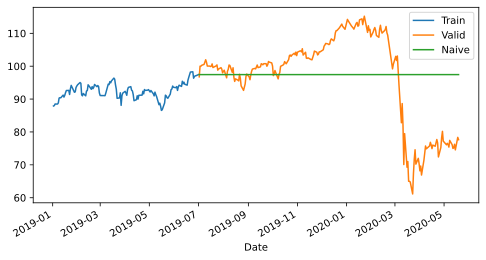

In [37]:
# copiar o último valor do dataset train e atribuir à h_hat['naive']
y_hat['naive'] = train.iloc[-1].values[0]

# plotar train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['naive'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Naive'])
plt.show()

In [40]:
# Calcular o erro da previsão RMSE
from sklearn.metrics import mean_squared_error

print("Erro do Método Naive Method:")
mean_squared_error(y_hat["Adj Close"], y_hat.naive, squared=True)

Erro do Método Naive Method:


181.82404342820786

In [0]:
#Média Móveis

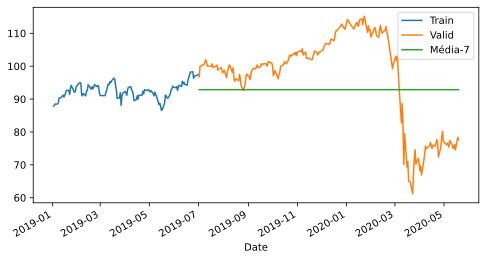

In [46]:
# calcular a média dos últimos 7 valores disponíveis
y_hat['m7'] = train["Adj Close"].rolling(50).mean().iloc[-1]

# plotar train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['m7'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Média-7'])
plt.show()

In [48]:
# Calcular o erro da previsão RMSE
print("Erro da Média de 7 dias:")
mean_squared_error(y_hat["Adj Close"], y_hat.m7, squared=True)

Erro da Média de 7 dias:


198.5069924233428

In [0]:
# importar pacotes necessários
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt

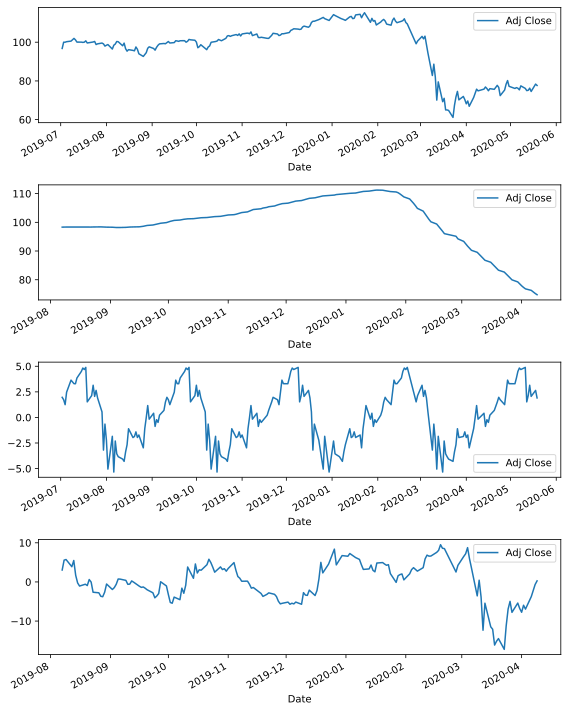

In [58]:
# salvar os componentes da *time series* na variável results
result = seasonal_decompose(valid, freq= 50)

# plotar componentes
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(8,10))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


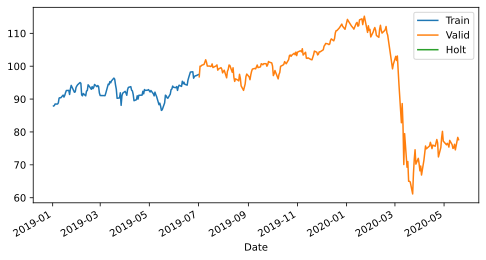

In [78]:
# salvar os valores para o dataset valid usando Holt's
y_hat['holt'] = Holt(train["Adj Close"]).fit(smoothing_level=0.1, smoothing_slope=0.1).forecast(len(valid))

# plotar train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['holt'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Holt'])
plt.show()

In [75]:
# Calcular o erro
print("Erro do Holt's Linear Trend Model:")
mean_squared_error(valid["Adj Close"], y_hat.holt, squared=True)

Erro do Holt's Linear Trend Model:


ValueError: ignored